In [9]:
# comment
# observations

In [10]:
# importing required libiries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ---> plot we can see in notebook only in separate window
%matplotlib inline   
import warnings
warnings.filterwarnings("ignore")

In [174]:
# importing data and reading first 5 rows

data = pd.read_csv("student.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Categorical features : 
    Nominal : gender, race/ethnicity, lunch, test preparation cource
    Ordinal : parental level of enducation
### Numerical features : 
    Continous : math score, reading score, writing score

In [13]:
# reading last five notes

data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [15]:
# Checking no. of rows and columns

data.shape

(1000, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
data['gender'].dtypes

dtype('O')

In [19]:
data['gender'].dtypes=='O'

True

In [21]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [31]:
# Categorical features

cat_col = [fea for fea in data.columns if data[fea].dtypes=='O']

In [32]:
# Numerical features

num_col = [fea for fea in data.columns if data[fea].dtypes!='O']

In [35]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [36]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [37]:
# checking data occuping in RAM

data.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [40]:
# Missing values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [41]:
data.isnull().sum().sum()

0

No Null values

In [43]:
## Checking duplicates

data.duplicated().sum()

0

No Duplicates

In [46]:
# Checking no of unique values

data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [47]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [50]:
# Statistical approch

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [52]:
# Correlation of data

data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Conclusion : correlation between reading score and writing score is very high
    
    person who can read also can right

In [53]:
data.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [65]:
# checking skewness of the data

data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

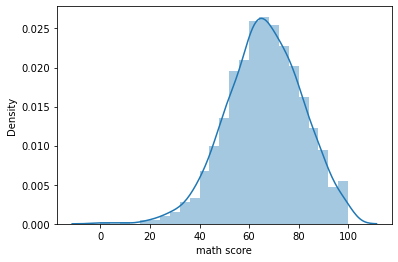

In [55]:
sns.distplot(data['math score'])

conclusion : Left skewed 

In [76]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [221]:
average_marks_in_sub = (data['math score']+data['reading score']+data['writing score'])/3

In [222]:
data['average_marks_in_sub']=average_marks_in_sub

In [223]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_marks_in_sub
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [80]:
data.groupby('gender').mean()

,math score,reading score,writing score,average_marks_in_sub
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


### No of students less than 30 marks

In [87]:
data[data['math score'] < 30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
average_marks_in_sub           14
dtype: int64

# checking normal distribution and p value
if p > 0.05 --> normal distribution

In [91]:
from scipy.stats import normaltesttest

In [98]:
data[num_col].columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [92]:
normaltest(data[num_col])

NormaltestResult(statistic=array([15.40896051, 11.1174128 , 13.60645084]), pvalue=array([0.0004508 , 0.00385376, 0.00111019]))

In [100]:
p_value_math_score = normaltest(data[num_col])[1][0] * 100

In [103]:
if p_value_math_score > 0.05:
    print('math score is normally/Gassian distributed')
else:
    print('math score is not normally/Gassian distributed')

math score is not normally/Gassian distributed


## Checking Outliers

<AxesSubplot:xlabel='math score', ylabel='Density'>

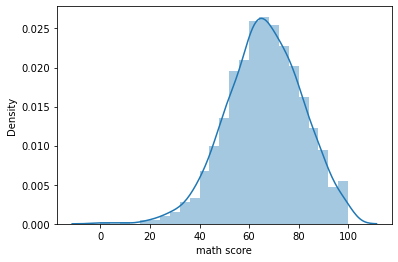

In [124]:
sns.distplot(data['math score'])

<AxesSubplot:xlabel='math score'>

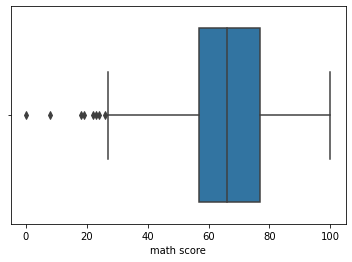

In [121]:
sns.boxplot(data['math score'])

In [123]:
data['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

In [175]:
data['math score'].quantile([0.25,0.50,0.75])

0.25    57.0
0.50    66.0
0.75    77.0
Name: math score, dtype: float64

In [176]:
Q1 = data['math score'].quantile([0.25,0.50,0.75]).values[0]
Q2 = data['math score'].quantile([0.25,0.50,0.75]).values[1]
Q3 = data['math score'].quantile([0.25,0.50,0.75]).values[2]

In [177]:
IQR = Q3 - Q1
l_fence = Q1 - IQR * 1.5
u_fence = Q3 + IQR * 1.5

In [178]:
l_fence,u_fence

(27.0, 107.0)

In [212]:
data[data['math score'] < l_fence].index.shape[0]


8

In [ ]:
data[data['math score'] < l_fence]

In [ ]:
data[data['math score'] > u_fence]

# lets remove only 10% of data from first and last

In [136]:
data['math score'].quantile([0.10,0.90])

0.1    47.0
0.9    86.0
Name: math score, dtype: float64

In [140]:
Q1 = data['math score'].quantile([0.10,0.90]).values[0]
Q3 = data['math score'].quantile([0.10,0.90]).values[1]
IQR = Q3 - Q1
l_fence = Q1 - (IQR * 1.5)
u_fence = Q3 + (IQR * 1.5)

In [141]:
IQR, l_fence, u_fence

(39.0, -11.5, 144.5)

In [144]:
data[data['math score'] < l_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_marks_in_sub


In [146]:
data[data['math score'] > u_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_marks_in_sub


Conclusion : No records lies out side lower limit and upper limit

In [213]:
# writing in a function

def removal_outlier(df, feature, q1_range, q3_range):
    Q1 = df[feature].quantile(q1_range)
    Q3 = df[feature].quantile(q3_range)
    IQR = Q3 - Q1
    l_fence = Q1 - IQR * 1.5
    u_fence = Q3 + IQR * 1.5
    print(feature, IQR, l_fence, u_fence)
    print('no of records removed below lower fense : ', data[data[feature] < l_fence].index.shape[0])
    print('no of records removed above upper fense : ', data[data[feature] > u_fence].index.shape[0])
    data.drop(index=data[data[feature] < l_fence].index, inplace=True)
    data.drop(index=data[data[feature] > u_fence].index, inplace=True)


In [216]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [214]:
num_col

['math score', 'reading score', 'writing score']

In [215]:
removal_outlier(data, 'math score', 0.25, 0.75)

math score 20.0 27.0 107.0
no of records removed below lower fense :  8
no of records removed above upper fense :  0


In [169]:
removal_outlier(data, 'reading score', 0.25, 0.75)

reading score 20.0 30.0 110.0


AttributeError: 'Int64Index' object has no attribute 'count'

In [165]:
data[data['writing score'] < l_fence].index

Int64Index([], dtype='int64')

In [ ]:
removal_outlier(data, 'writing score', 0.25, 0.75)

In [153]:
data[data['math score'] < l_fence].index

Int64Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

# Graph Analysis

In [217]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='count'>

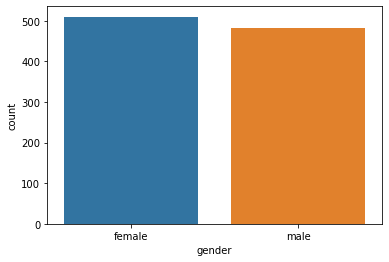

In [218]:
sns.countplot(data['gender'])

Conclusion : male and Female are have equal members

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

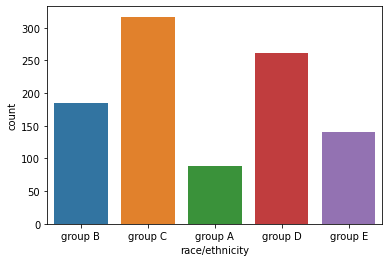

In [219]:
sns.countplot(data['race/ethnicity'])

In [229]:
data.groupby('gender').mean()

,math score,reading score,writing score,average_marks_in_sub
gender,,,,
female,64.356863,73.231373,73.158824,70.249020
male,68.728216,65.473029,63.311203,65.837483


In [231]:
df = data.groupby('gender').mean()

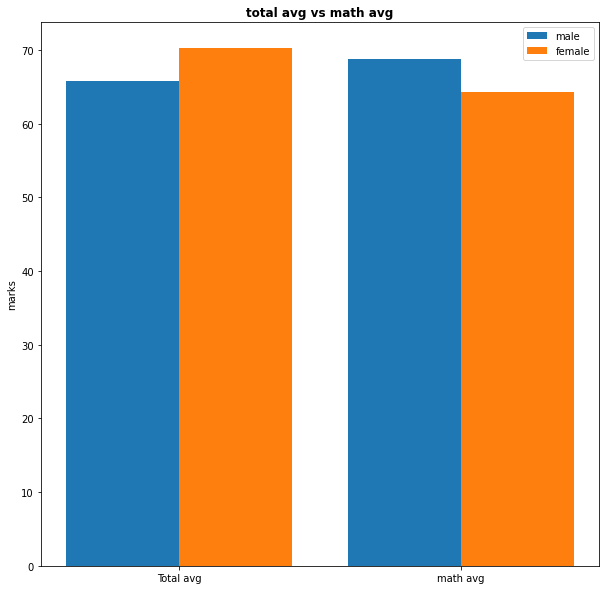

In [233]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['average_marks_in_sub'][0],df['math score'][0]
male_score=df['average_marks_in_sub'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [249]:
data.corr()

,math score,reading score,writing score,average_marks_in_sub
math score,1.000000,0.806838,0.789300,0.912338
reading score,0.806838,1.000000,0.952531,0.969393
writing score,0.789300,0.952531,1.000000,0.963846
average_marks_in_sub,0.912338,0.969393,0.963846,1.000000


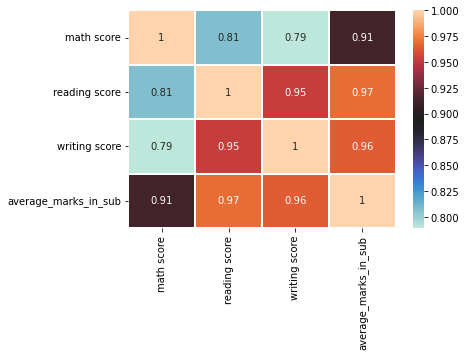

In [250]:
sns.heatmap(data.corr(), annot=True, cmap='icefire', linewidths=0.3)
fig=plt.gcf()

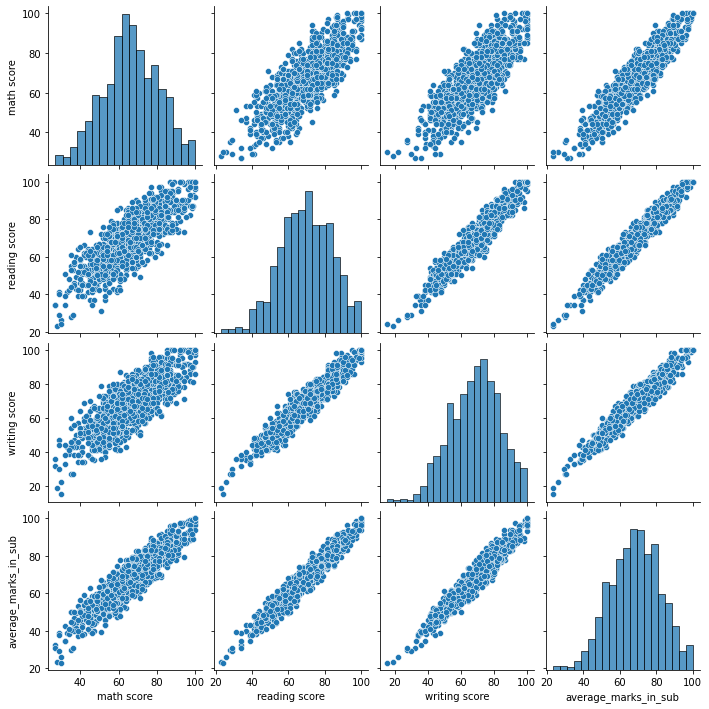

In [242]:
sns.pairplot(data)

<AxesSubplot:>

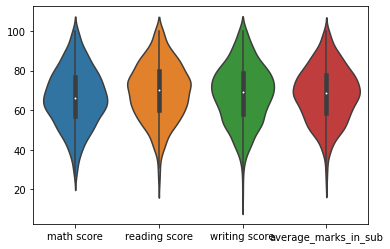

In [252]:
sns.violinplot(data=data)